In [1]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from PIL import Image
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

img_path = 'upper_set_10000/2019-02-10 17_57_46/1. figure2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

ModuleNotFoundError: No module named 'keras'

In [136]:
def preprocess_image_scale(image_path, img_size=None):
    '''
    Preprocess the image scaling it so that its larger size is max_size.
    This function preserves aspect ratio.
    '''
    img = image.load_img(image_path)
    if img_size:
        scale = float(img_size) / max(img.size)
        new_size = (int(np.ceil(scale * img.size[0])), int(np.ceil(scale * img.size[1])))
        img = img.resize(new_size, resample=Image.BILINEAR)
    return img

In [151]:
i = preprocess_image_scale(img_path, img_size=224)

In [154]:
img_data = image.img_to_array(i)

In [185]:
subdir_name = 'upper_set_10000/'

vgg16_feature_list = []
img_path_list = []

subdir = os.listdir(subdir_name)
subdir = [x for x in subdir if x not in '.DS_Store']

for idx, dirname in enumerate(subdir):
    filenames = os.listdir(subdir_name+dirname)
    filenames = [x for x in filenames if x not in '.DS_Store']
    
    for i, fname in enumerate(filenames):
        img_path = subdir_name + dirname +'/'+ fname
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            preprocess_image_scale(img_path, img_size=224)
        except OSError as e:
            print(img_path)
            print(i)
            print(e)
            continue
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        img_path_list.append(img_path)
        
        vgg16_feature = model.predict(img_data)
        vgg16_feature_np = np.array(vgg16_feature)
        vgg16_feature_list.append(vgg16_feature_np.flatten())
        if i % 50 == 0:
            print(str(round((i/len(filenames))*100))+'% done')

0% done
8% done
16% done
24% done
32% done
40% done
48% done
56% done
64% done
72% done
81% done
upper_set_10000/2019-02-10 17_57_46/264. ?media_id=1924216510987537.jpg
503
cannot identify image file 'upper_set_10000/2019-02-10 17_57_46/264. ?media_id=1924216510987537.jpg'
89% done
97% done
upper_set_10000/2019-02-10 17_57_46/191. 91_b50_p110_l.jpg.jpg
601
cannot identify image file 'upper_set_10000/2019-02-10 17_57_46/191. 91_b50_p110_l.jpg.jpg'


In [186]:
from sklearn.cluster import KMeans
vgg16_feature_list_np = np.array(vgg16_feature_list)
kmeans = KMeans(n_clusters=2, random_state=0).fit(vgg16_feature_list_np)

In [187]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_vgg16_feature_list_np = pca.fit_transform(vgg16_feature_list_np)

In [190]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_vgg16_feature_list_np = tsne.fit_transform(vgg16_feature_list_np)

In [193]:
import umap

reducer = umap.UMAP()

umap_vgg16_feature_list_np = reducer.fit_transform(vgg16_feature_list_np)

<IPython.core.display.Javascript object>


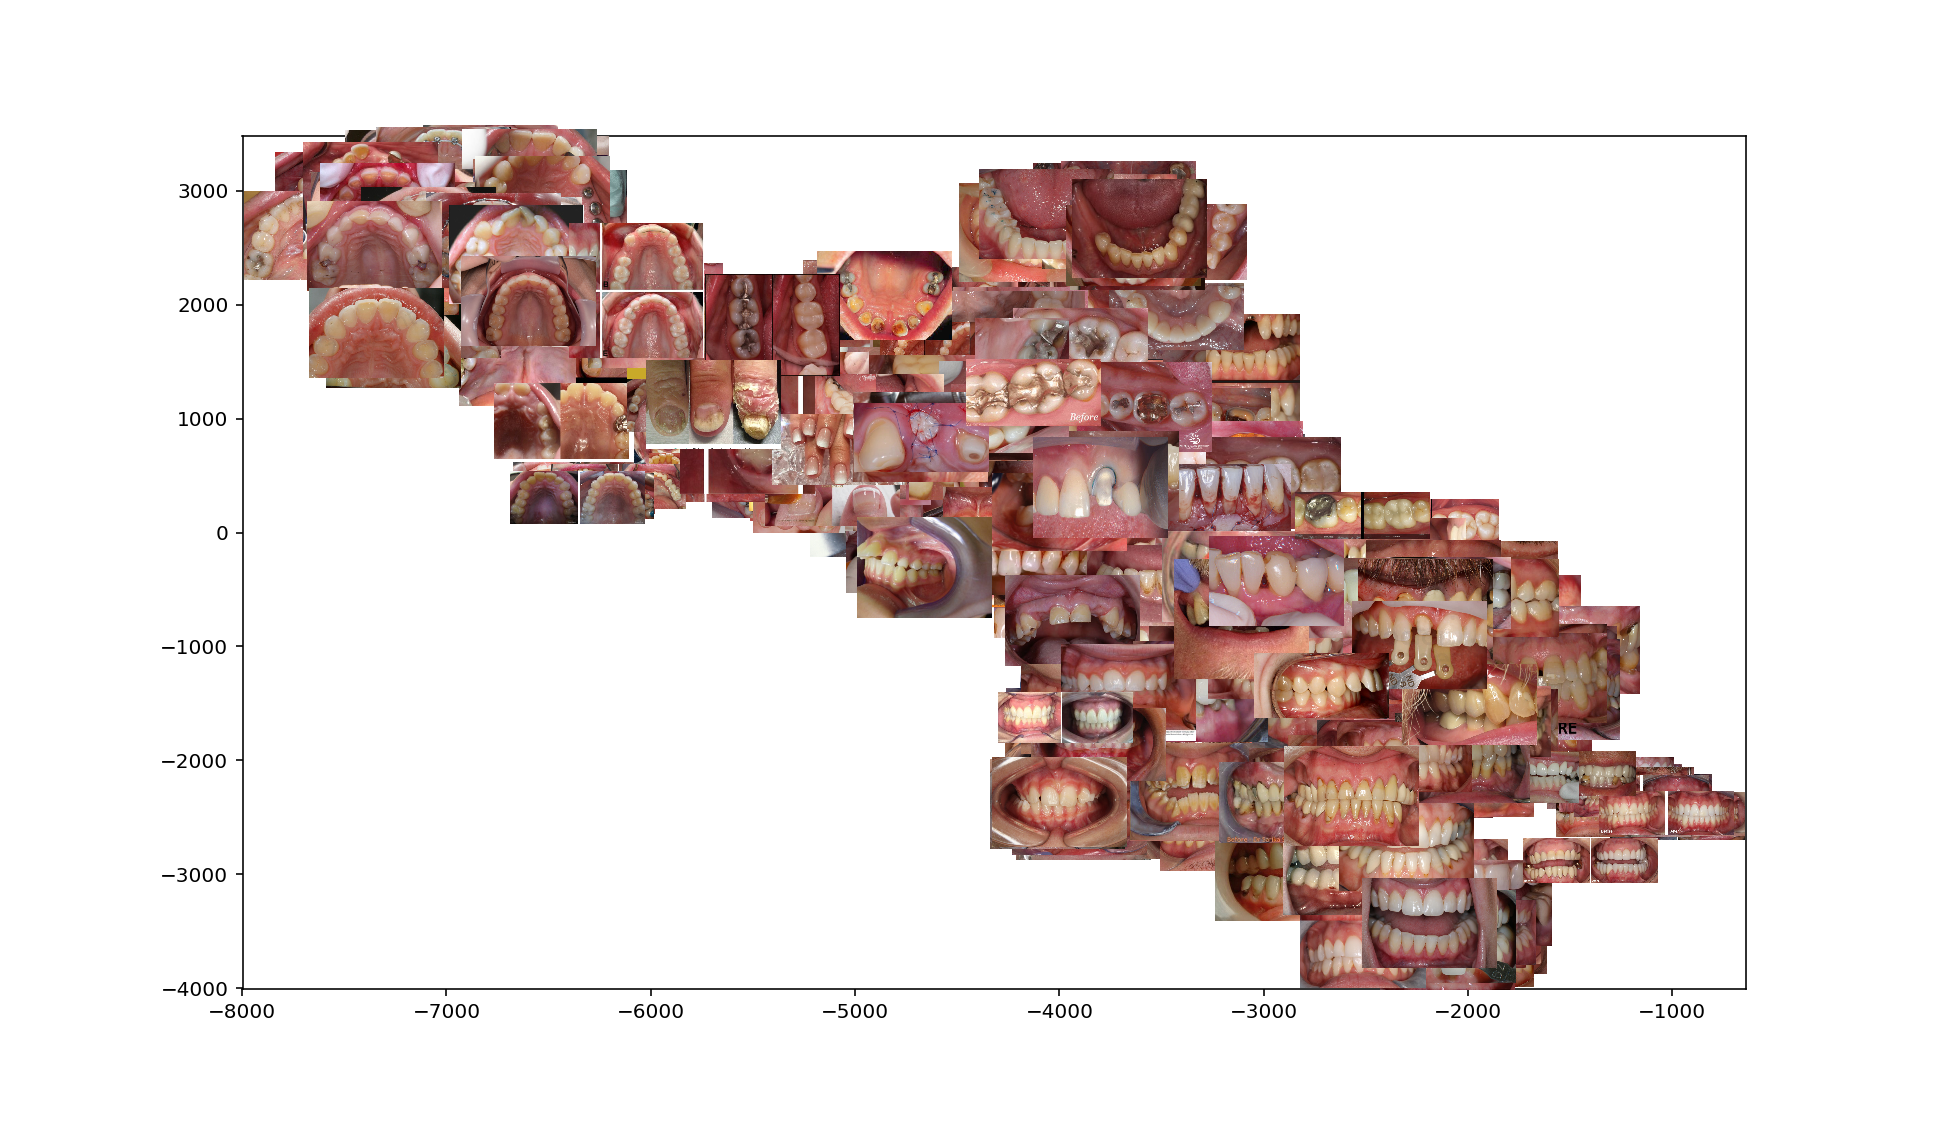

In [205]:
%matplotlib notebook
n = 300

#coords = pca_vgg16_feature_list_np
#coords = tsne_vgg16_feature_list_np 
coords = umap_vgg16_feature_list_np[:n,:] 
paths =  img_path_list[:n]

x = coords[:,0] * 1000
y = coords[:,1] * 1000


import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path,zoom=0.1):
    #img = image.load_img(path, target_size=(224, 224))
    img = preprocess_image_scale(path, img_size=224*3)
    #img = image.load_img(path)
    return OffsetImage(img,zoom=zoom)


fig, ax = plt.subplots()
ax.scatter(x, y) 

artists = []
for x0, y0, path in zip(x, y, img_path_list):
    
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    artists.append(ax.add_artist(ab))

<IPython.core.display.Javascript object>


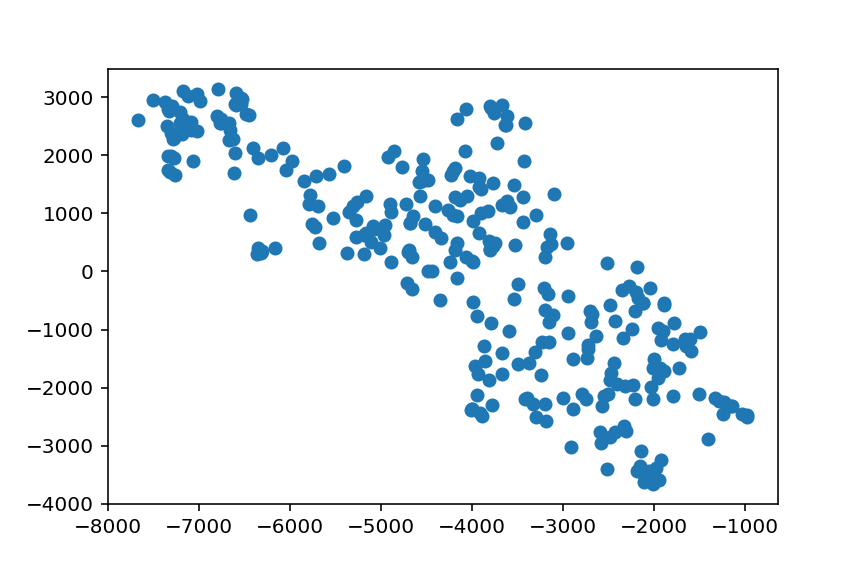

In [206]:
fig, ax = plt.subplots()
ax.scatter(x, y) 